In [1]:
pip install pytesseract Pillow


  Obtaining dependency information for pytesseract from https://files.pythonhosted.org/packages/c5/54/ec007336f38d2d4ce61f3544af3e6855dacbf04a1ac8294f10cabe81146f/pytesseract-0.3.10-py3-none-any.whl.metadata
  Using cached pytesseract-0.3.10-py3-none-any.whl.metadata (11 kB)
Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tesseract 



  Using cached tesseract-0.1.3-py3-none-any.whl


C:\Users\aliou\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


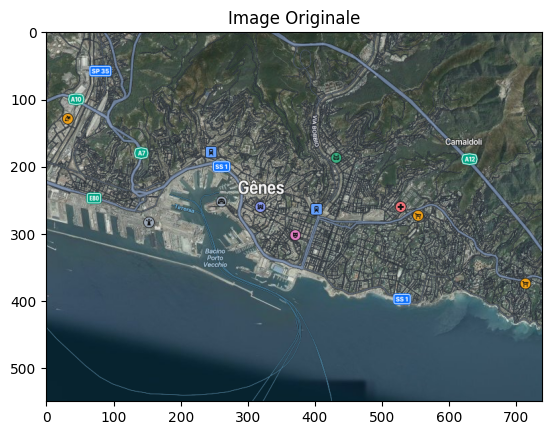

Using CPU. Note: This module is much faster with a GPU.


Texte extrait par easyocr:
Text: Camaldoli, Probability: 0.9999399176155841
Text: Gênes, Probability: 0.9999588430244524
Text: Bacino, Probability: 0.9338988177371237
Text: Pag, Probability: 0.024892224526647157
Text: Vaccho, Probability: 0.6794338989149642
{
    "extracted_data": [
        {
            "city": "Camaldoli",
            "bbox": [
                [
                    593,
                    157
                ],
                [
                    653,
                    157
                ],
                [
                    653,
                    173
                ],
                [
                    593,
                    173
                ]
            ],
            "probability": 0.9999399176155841
        },
        {
            "city": "Gênes",
            "bbox": [
                [
                    284,
                    218
                ],
                [
                    360,
                    218
                ],
   

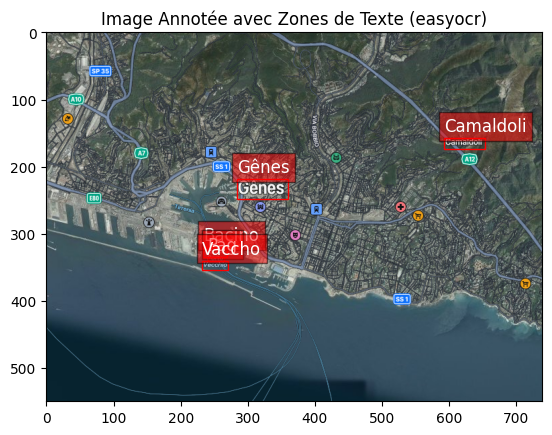

In [6]:
import easyocr
from PIL import Image
import json
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Genova.png'
image = Image.open(image_path)

# Afficher l'image pour vérification
plt.imshow(image)
plt.title('Image Originale')
plt.show()

# Utiliser easyocr pour l'OCR
reader = easyocr.Reader(['fr'], gpu=False)  # Spécifier la langue française
result = reader.readtext(image_path)

# Afficher les résultats
print("Texte extrait par easyocr:")
extracted_data = []
for (bbox, text, prob) in result:
    print(f"Text: {text}, Probability: {prob}")
    if "Gênes" in text or "Camaldoli" in text:
        # Convertir les valeurs bbox en types standards
        bbox_standard = [tuple(map(int, point)) for point in bbox]
        extracted_data.append({
            'city': text,
            'bbox': bbox_standard,
            'probability': float(prob)
        })

# Formater le résultat en JSON
output = {
    'extracted_data': extracted_data
}

# Sauvegarder le résultat dans un fichier JSON
with open('ocr_result_easyocr.json', 'w', encoding='utf-8') as f:
    json.dump(output, f, ensure_ascii=False, indent=4)

# Afficher le résultat
output_json = json.dumps(output, ensure_ascii=False, indent=4)
print(output_json)

# Afficher les zones de texte détectées
image_draw = Image.open(image_path)
plt.imshow(image_draw)
for (bbox, text, prob) in result:
    bbox_standard = [tuple(map(int, point)) for point in bbox]
    plt.gca().add_patch(plt.Rectangle((bbox_standard[0][0], bbox_standard[0][1]), bbox_standard[2][0] - bbox_standard[0][0], bbox_standard[2][1] - bbox_standard[0][1], edgecolor='red', facecolor='none'))
    plt.text(bbox_standard[0][0], bbox_standard[0][1] - 10, text, bbox=dict(facecolor='red', alpha=0.5), fontsize=12, color='white')
plt.title('Image Annotée avec Zones de Texte (easyocr)')
plt.show()
